In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from os import listdir, makedirs
from os.path import join, exists, expanduser
from tqdm import tqdm
from sklearn.metrics import log_loss, accuracy_score
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications import xception
from keras.applications import inception_v3
from keras.applications.vgg16 import preprocess_input, decode_predictions
from sklearn.linear_model import LogisticRegression

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [4]:
start = dt.datetime.now()

In [5]:
label=pd.read_csv("D:/project/labels.csv")
label

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [6]:
label_df=pd.DataFrame(label['breed'].value_counts()).reset_index()
label_df.columns=['breed_name','count']
label_df=label_df.head(16)
label_df

,breed_name,count
0,scottish_deerhound,126
1,maltese_dog,117
2,afghan_hound,116
3,entlebucher,115
4,bernese_mountain_dog,114
5,shih-tzu,112
6,great_pyrenees,111
7,pomeranian,111
8,basenji,110
9,samoyed,109


In [7]:
label_df.sort_values(by="count",ascending=False)

,breed_name,count
0,scottish_deerhound,126
1,maltese_dog,117
2,afghan_hound,116
3,entlebucher,115
4,bernese_mountain_dog,114
5,shih-tzu,112
6,great_pyrenees,111
7,pomeranian,111
8,basenji,110
9,samoyed,109


In [8]:
label = label[label['breed'].isin(label_df['breed_name'])]

In [9]:
label['id_ext']=label['id'].apply(lambda x:x+'.jpg')
label=label.reset_index()
label=label.drop(['index','id'],axis=1)

C:\Users\13245\AppData\Local\Temp/ipykernel_13928/2497575848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label['id_ext']=label['id'].apply(lambda x:x+'.jpg')


In [10]:
label.head()

,breed,id_ext
0,basenji,003df8b8a8b05244b1d920bb6cf451f9.jpg
1,scottish_deerhound,0042188c895a2f14ef64a918ed9c7b64.jpg
2,maltese_dog,00693b8bc2470375cc744a6391d397ec.jpg
3,cairn,00bee065dcec471f26394855c5c2f3de.jpg
4,tibetan_terrier,013f8fdf6d638c7bb042f5f17e8a9fdc.jpg


In [11]:
label_onehot=pd.get_dummies(label,columns=['breed'],prefix=None)

In [12]:
label_onehot

,id_ext,breed_afghan_hound,breed_airedale,breed_basenji,breed_beagle,breed_bernese_mountain_dog,breed_cairn,breed_entlebucher,breed_great_pyrenees,breed_japanese_spaniel,breed_leonberg,breed_maltese_dog,breed_pomeranian,breed_samoyed,breed_scottish_deerhound,breed_shih-tzu,breed_tibetan_terrier
0,003df8b8a8b05244b1d920bb6cf451f9.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0042188c895a2f14ef64a918ed9c7b64.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,00693b8bc2470375cc744a6391d397ec.jpg,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,00bee065dcec471f26394855c5c2f3de.jpg,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,013f8fdf6d638c7bb042f5f17e8a9fdc.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,ffa4e1bf959425bad9228b04af40ac76.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1773,ffc532991d3cd7880d27a449ed1c4770.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1774,ffcde16e7da0872c357fbc7e2168c05f.jpg,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1775,ffcffab7e4beef9a9b8076ef2ca51909.jpg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [13]:
label_onehot.columns

Index(['id_ext', 'breed_afghan_hound', 'breed_airedale', 'breed_basenji',
       'breed_beagle', 'breed_bernese_mountain_dog', 'breed_cairn',
       'breed_entlebucher', 'breed_great_pyrenees', 'breed_japanese_spaniel',
       'breed_leonberg', 'breed_maltese_dog', 'breed_pomeranian',
       'breed_samoyed', 'breed_scottish_deerhound', 'breed_shih-tzu',
       'breed_tibetan_terrier'],
      dtype='object')

In [14]:
label_onehot.columns = label_onehot.columns.str.replace(r'breed_', '')

In [15]:
#label_onehot
label_onehot=label_onehot.rename(columns={'id_ext':'id'})

In [16]:
label_onehot

,id,afghan_hound,airedale,basenji,beagle,bernese_mountain_dog,cairn,entlebucher,great_pyrenees,japanese_spaniel,leonberg,maltese_dog,pomeranian,samoyed,scottish_deerhound,shih-tzu,tibetan_terrier
0,003df8b8a8b05244b1d920bb6cf451f9.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0042188c895a2f14ef64a918ed9c7b64.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,00693b8bc2470375cc744a6391d397ec.jpg,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,00bee065dcec471f26394855c5c2f3de.jpg,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,013f8fdf6d638c7bb042f5f17e8a9fdc.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,ffa4e1bf959425bad9228b04af40ac76.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1773,ffc532991d3cd7880d27a449ed1c4770.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1774,ffcde16e7da0872c357fbc7e2168c05f.jpg,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1775,ffcffab7e4beef9a9b8076ef2ca51909.jpg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [17]:
import random
sample=random.choice(label_onehot['id'])
sample

'9bf204c0add25dd912699fedc1f25aac.jpg'

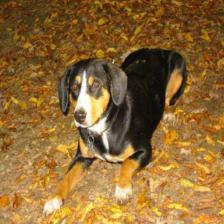

In [18]:
image=load_img("D:/project/train/"+sample)
image

In [19]:
train_df, validate_df = train_test_split(label_onehot, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

# validate_df = validate_df.sample(n=100).reset_index() # use for fast testing code purpose
# train_df = train_df.sample(n=1800).reset_index() # use for fast testing code purpose

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [20]:
train_df.shape,validate_df.shape

((1599, 18), (178, 18))

In [21]:
train_df

,index,id,afghan_hound,airedale,basenji,beagle,bernese_mountain_dog,cairn,entlebucher,great_pyrenees,japanese_spaniel,leonberg,maltese_dog,pomeranian,samoyed,scottish_deerhound,shih-tzu,tibetan_terrier
0,1341,c228896e03be709a8950d9d839fbba31.jpg,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1638,ea829d433019aedcdeb0215c10ea905b.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,926,8a6b1a95cce4538252dbc28cfcebb8ad.jpg,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,156,14f25ad78f02126a1ceeb44385378cd1.jpg,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,318,32d033e45db00bb90ce1b53589116de4.jpg,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,210,1e7146baafda5edbd4e9abdf08f728fa.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1595,1511,da438857d2816db182869858f4f3efbc.jpg,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1596,1465,d41481d28f1972447339510abcb6ef62.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1597,559,5406eeabc4f6b981cc6f61cc7a335eae.jpg,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [22]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 4
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(16, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

D:\Anaconda3\lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [23]:
train_df

,index,id,afghan_hound,airedale,basenji,beagle,bernese_mountain_dog,cairn,entlebucher,great_pyrenees,japanese_spaniel,leonberg,maltese_dog,pomeranian,samoyed,scottish_deerhound,shih-tzu,tibetan_terrier
0,1341,c228896e03be709a8950d9d839fbba31.jpg,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1638,ea829d433019aedcdeb0215c10ea905b.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,926,8a6b1a95cce4538252dbc28cfcebb8ad.jpg,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,156,14f25ad78f02126a1ceeb44385378cd1.jpg,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,318,32d033e45db00bb90ce1b53589116de4.jpg,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,210,1e7146baafda5edbd4e9abdf08f728fa.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1595,1511,da438857d2816db182869858f4f3efbc.jpg,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1596,1465,d41481d28f1972447339510abcb6ef62.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1597,559,5406eeabc4f6b981cc6f61cc7a335eae.jpg,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [24]:
train_df.columns

Index(['index', 'id', 'afghan_hound', 'airedale', 'basenji', 'beagle',
       'bernese_mountain_dog', 'cairn', 'entlebucher', 'great_pyrenees',
       'japanese_spaniel', 'leonberg', 'maltese_dog', 'pomeranian', 'samoyed',
       'scottish_deerhound', 'shih-tzu', 'tibetan_terrier'],
      dtype='object')

In [26]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "D:/project/train", 
    x_col='id',
    y_col=['afghan_hound', 'airedale', 'basenji', 'beagle',
       'bernese_mountain_dog', 'cairn', 'entlebucher', 'great_pyrenees',
       'japanese_spaniel', 'leonberg', 'maltese_dog', 'pomeranian', 'samoyed',
       'scottish_deerhound', 'shih-tzu', 'tibetan_terrier'],
    class_mode='raw',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 1599 validated image filenames.


In [28]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "D:/project/train", 
    x_col='id',
    y_col=['afghan_hound', 'airedale', 'basenji', 'beagle',
       'bernese_mountain_dog', 'cairn', 'entlebucher', 'great_pyrenees',
       'japanese_spaniel', 'leonberg', 'maltese_dog', 'pomeranian', 'samoyed',
       'scottish_deerhound', 'shih-tzu', 'tibetan_terrier'],
    class_mode='raw',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 178 validated image filenames.


Found 1 validated image filenames.


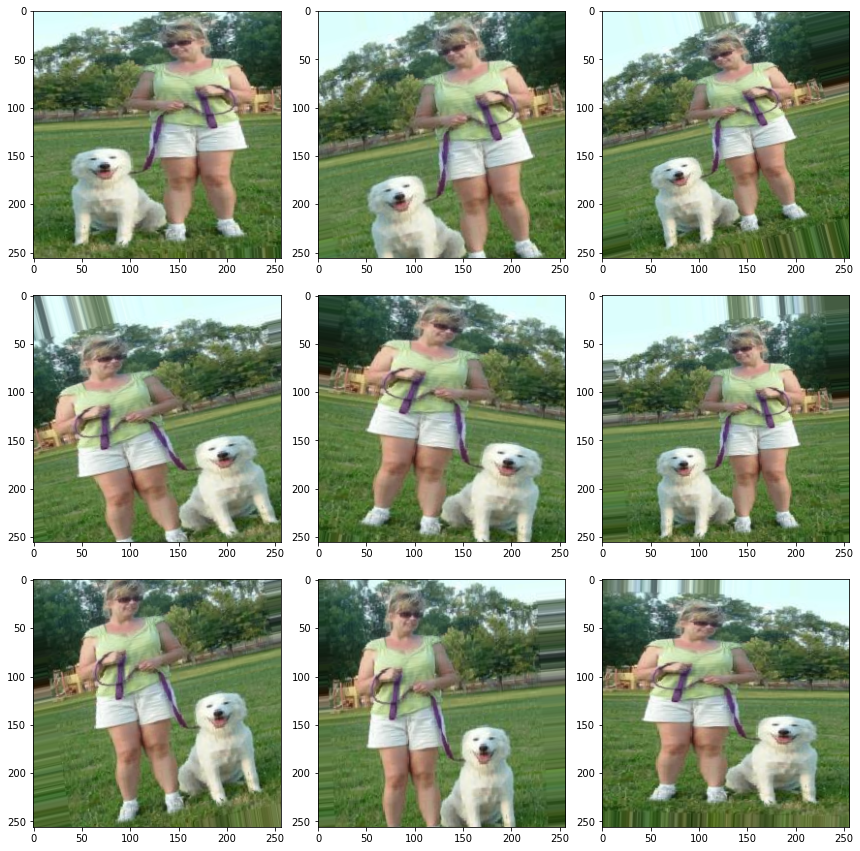

In [29]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "D:/project/train/", 
    x_col='id',
    y_col=['afghan_hound', 'airedale', 'basenji', 'beagle',
       'bernese_mountain_dog', 'cairn', 'entlebucher', 'great_pyrenees',
       'japanese_spaniel', 'leonberg', 'maltese_dog', 'pomeranian', 'samoyed',
       'scottish_deerhound', 'shih-tzu', 'tibetan_terrier'],
    class_mode='raw',
)
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [30]:
# fine-tune the model
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

C:\Users\13245\AppData\Local\Temp/ipykernel_13928/42373465.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/4
99/99 [==============================] - 458s 5s/step - loss: 0.5447 - accuracy: 0.0556 - val_loss: 0.2846 - val_accuracy: 0.0739
Epoch 2/4
99/99 [==============================] - 457s 5s/step - loss: 0.3181 - accuracy: 0.0638 - val_loss: 0.2429 - val_accuracy: 0.0795
Epoch 3/4
99/99 [==============================] - 458s 5s/step - loss: 0.2899 - accuracy: 0.0720 - val_loss: 0.2397 - val_accuracy: 0.0795
Epoch 4/4
99/99 [==============================] - 456s 5s/step - loss: 0.2840 - accuracy: 0.0745 - val_loss: 0.2392 - val_accuracy: 0.0682


In [31]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

C:\Users\13245\AppData\Local\Temp/ipykernel_13928/2489114373.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)


Test: accuracy = 0.068182  ;  loss = 0.239087 


In [32]:
validate_df

,index,id,afghan_hound,airedale,basenji,beagle,bernese_mountain_dog,cairn,entlebucher,great_pyrenees,japanese_spaniel,leonberg,maltese_dog,pomeranian,samoyed,scottish_deerhound,shih-tzu,tibetan_terrier
0,1132,a57247bc5d572abd95f1aea215b7de77.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,545,51a983d146c12574987f3ae82a18c5d0.jpg,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1228,b3e2de0e9d1a5c6c180277b87b85971f.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,120,1041e0480ed0b88c41169fb2b119fcf7.jpg,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1460,d34fba7b6362358f5bd02827ce6389e8.jpg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,610,5c64fedd6974afbbd24651f91f3172f8.jpg,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174,236,22bfeccd7faa4d27ff4e6db3ffafef8b.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
175,239,235e1ec918707fc74225de8a5bfad3fe.jpg,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
176,732,6f3d31094ddb18242cc01c7d4934b163.jpg,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
def get_dog(row):
    for i in validate_df.columns[2:]:
        if row[i]==1:
            return i        
validate_df['breed']=validate_df.apply(get_dog,axis=1)

In [34]:
validate_df

,index,id,afghan_hound,airedale,basenji,beagle,bernese_mountain_dog,cairn,entlebucher,great_pyrenees,japanese_spaniel,leonberg,maltese_dog,pomeranian,samoyed,scottish_deerhound,shih-tzu,tibetan_terrier,breed
0,1132,a57247bc5d572abd95f1aea215b7de77.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,shih-tzu
1,545,51a983d146c12574987f3ae82a18c5d0.jpg,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,afghan_hound
2,1228,b3e2de0e9d1a5c6c180277b87b85971f.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,shih-tzu
3,120,1041e0480ed0b88c41169fb2b119fcf7.jpg,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,japanese_spaniel
4,1460,d34fba7b6362358f5bd02827ce6389e8.jpg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,samoyed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,610,5c64fedd6974afbbd24651f91f3172f8.jpg,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,afghan_hound
174,236,22bfeccd7faa4d27ff4e6db3ffafef8b.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,basenji
175,239,235e1ec918707fc74225de8a5bfad3fe.jpg,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,great_pyrenees
176,732,6f3d31094ddb18242cc01c7d4934b163.jpg,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,airedale


In [35]:
validate_df=validate_df[['id','breed']]

In [36]:
validate_df.shape

(178, 2)

24bf8f23543282c914eb6292e0ba2f71.jpg
ea1c23bc0a6d8c057a12d2a68b44c7c2.jpg
fb72489572110ed6d3e563c45f3ecb3e.jpg
49186fb43178b462d273cc98e330e26a.jpg
7e51be6584255a09aad57cc33e83f68b.jpg
89c587a6a853c816d3cea9337a8e814a.jpg
c2270e9f348520fda98ed82026fcf8a3.jpg
1c564272c2c290a83bf4a520359cfd5c.jpg
6f68ebaf89c39021195ce96796fc83ae.jpg


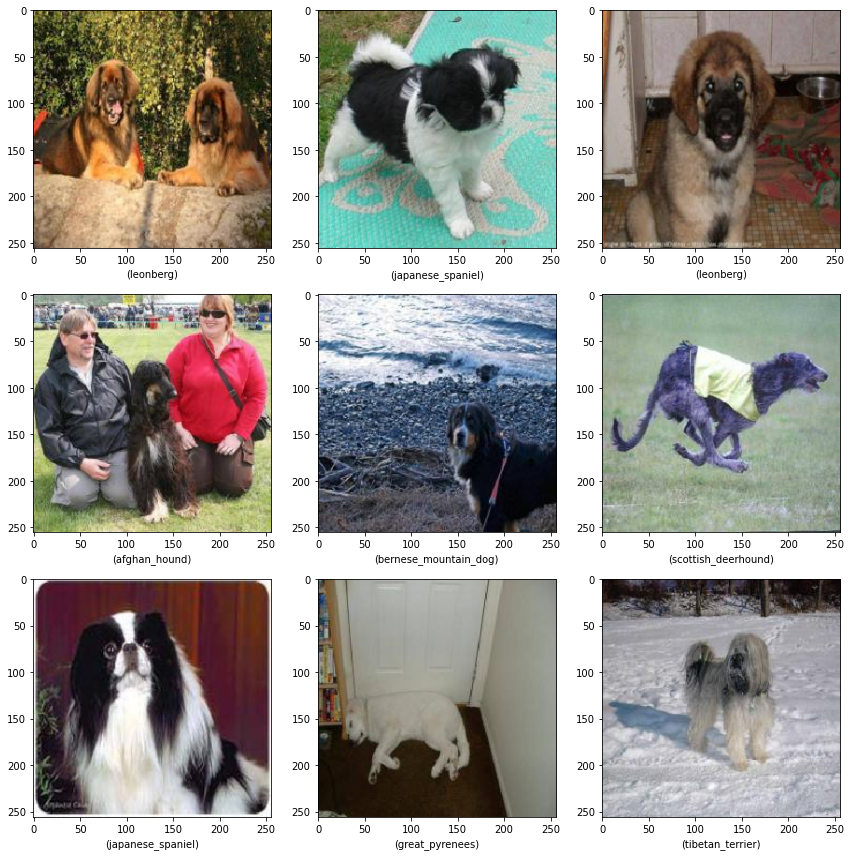

In [38]:
sample_test = validate_df.sample(n=9).reset_index()
#print(sample_test)
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['id']
    print(filename)
    category = row['breed']
    img = load_img("D:/project/train/"+filename, target_size=(256, 256))
    
    plt.subplot(3, 3,index+1)
    plt.imshow(img)
    plt.xlabel('(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

In [39]:
end = dt.datetime.now()
print('Total time {} s.'.format((end - start).seconds))

Total time 3997 s.
